In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('survey.csv')

In [3]:
# Issue 1: Missing Data
# Check for missing values in each column
missing_values = df.isnull().sum()

In [4]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

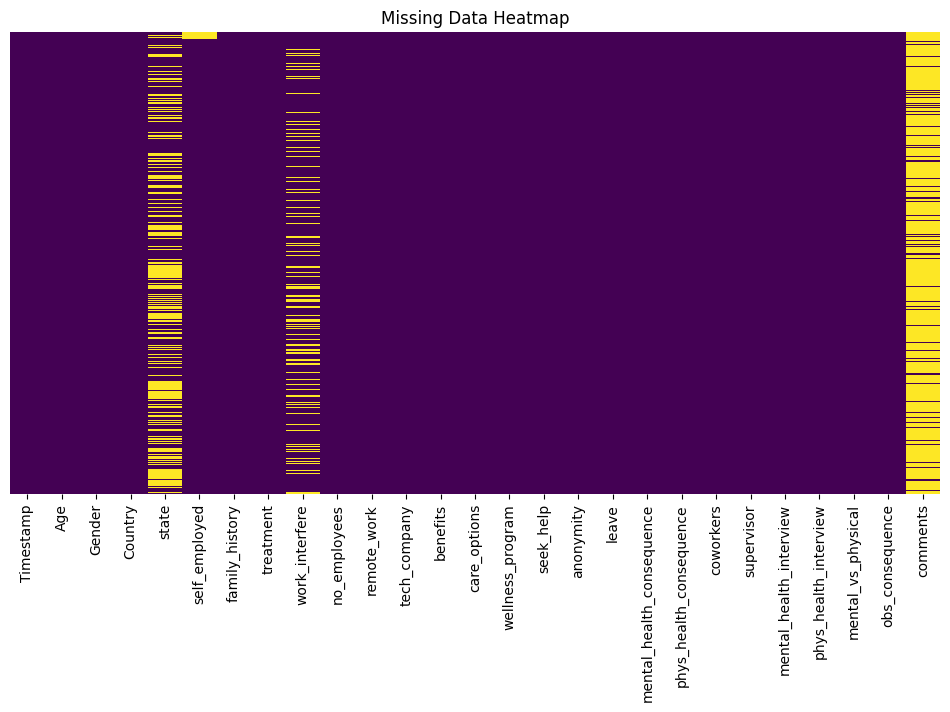

In [5]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
# Drop the 'Comments'  and 'State' Columns
df.drop(columns=['comments', 'state', 'no_employees', 'Timestamp'], inplace=True)

In [7]:
# Drop rows with missing values in the entire DataFrame
df.dropna(inplace=True)



In [8]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [9]:
# Define the columns to check for 'NA'
columns_to_check = ['self_employed', 'work_interfere']

# Drop rows where any of the specified columns contain the string 'NA'
df = df[~df[columns_to_check].eq('NA').any(axis=1)]



In [10]:
# Issue 2: Data Integrity and Consistency
# Explore unique values in categorical columns
categorical_columns = ['Gender', 'Country']
for col in categorical_columns:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Gender: ['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'f' 'Mal' 'queer/she/they' 'non-binary'
 'woman' 'Make' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Female '
 'Androgyne' 'Agender' 'cis-female/femme' 'Guy (-ish) ^_^'
 'male leaning androgynous' 'Male ' 'Trans woman' 'msle' 'Neuter'
 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male'
 'A little about you' 'Malr' 'p' 'Woman' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']
Unique values in Country: ['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Poland'
 'Australia' 'France' 'Germany' 'Mexico' 'Brazil' 'Slovenia' 'Ireland'
 'India' 'South Africa' 'Russia' 'Italy' 'Colombia' 'Portugal'
 'Switzerland' 'Belgium' 'Sweden' 'New Zealand' 'Zimbabwe' 'Finland'
 'Israel' 'Bosnia and Herzegovina' 'Austria' 'Hungary' 'Singapore' 'Japan'
 'Bulgaria' 'Croatia' 'Thailand' 'Denmark' 'Bahamas, The' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Ph

In [11]:
# Define a mapping to categorize the values
gender_mapping = {
    'Male': ['M', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)',
             'Make', 'Man', 'msle', 'Malr', 'Cis Man'],
    'Female': ['Female', 'Cis Female', 'F', 'something kinda male?', 'Woman', 'f',
               'Femake', 'woman', 'Female (trans)', 'femail', 'Female (cis)'],
    'Other': ['Trans-female', 'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby',
              'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
              'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
              'Male ', 'Trans woman', 'Neuter', 'queer', 'Mail', 'cis male',
              'A little about you', 'p', 'ostensibly male, unsure what that really means']
}

# Map the values to the three categories
df['Gender'] = df['Gender'].apply(lambda x: next((k for k, v in gender_mapping.items() if x.strip().lower() in v), 'Other'))

# Print the updated DataFrame
print(df)


      Age Gender        Country self_employed family_history treatment  \
18     46   Male  United States           Yes            Yes        No   
20     29   Male  United States            No            Yes       Yes   
21     31   Male  United States           Yes             No        No   
22     46   Male  United States            No             No       Yes   
23     41   Male  United States            No             No       Yes   
...   ...    ...            ...           ...            ...       ...   
1252   29   Male  United States            No            Yes       Yes   
1253   36   Male  United States            No            Yes        No   
1255   32   Male  United States            No            Yes       Yes   
1256   34   Male  United States            No            Yes       Yes   
1258   25   Male  United States            No            Yes       Yes   

     work_interfere remote_work tech_company    benefits  ...   anonymity  \
18        Sometimes         Yes   

In [12]:
# Issue 2: Data Integrity and Consistency
# Explore unique values in categorical columns
categorical_columns = ['Gender', 'Country']
for col in categorical_columns:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Gender: ['Male' 'Other' 'Female']
Unique values in Country: ['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Poland'
 'Australia' 'France' 'Germany' 'Mexico' 'Brazil' 'Slovenia' 'Ireland'
 'India' 'South Africa' 'Russia' 'Italy' 'Colombia' 'Portugal'
 'Switzerland' 'Belgium' 'Sweden' 'New Zealand' 'Zimbabwe' 'Finland'
 'Israel' 'Bosnia and Herzegovina' 'Austria' 'Hungary' 'Singapore' 'Japan'
 'Bulgaria' 'Croatia' 'Thailand' 'Denmark' 'Bahamas, The' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


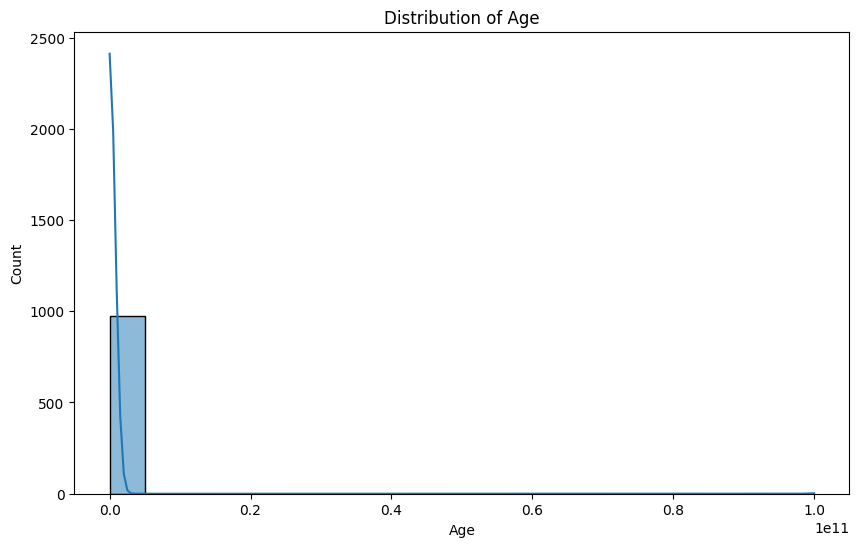

In [13]:
# Data Visualization for EDA
# Example: Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [14]:
# Define the lower and upper age limits
lower_limit = 0
upper_limit = 100

# Drop rows with 'Age' values outside the specified range
df = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]



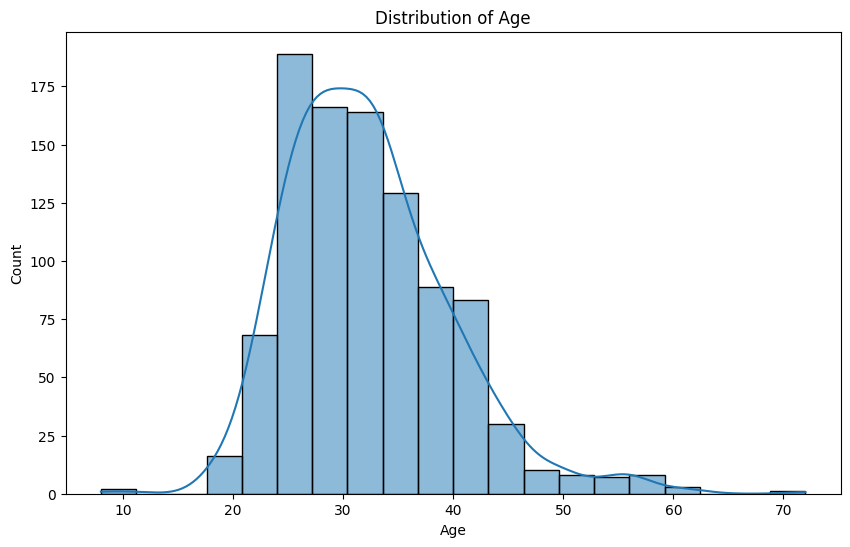

In [15]:
# Data Visualization for EDA
# Example: Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

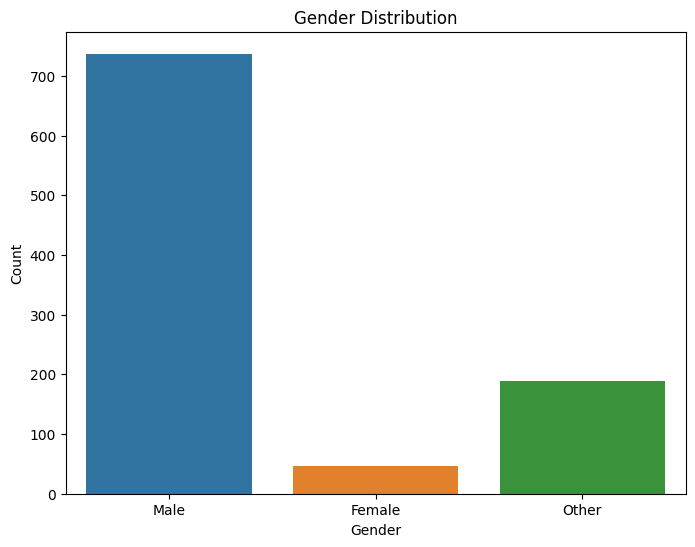

In [16]:
# Create a bar plot of gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', order=['Male', 'Female', 'Other'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [17]:
import numpy as np
from scipy.stats import chi2_contingency

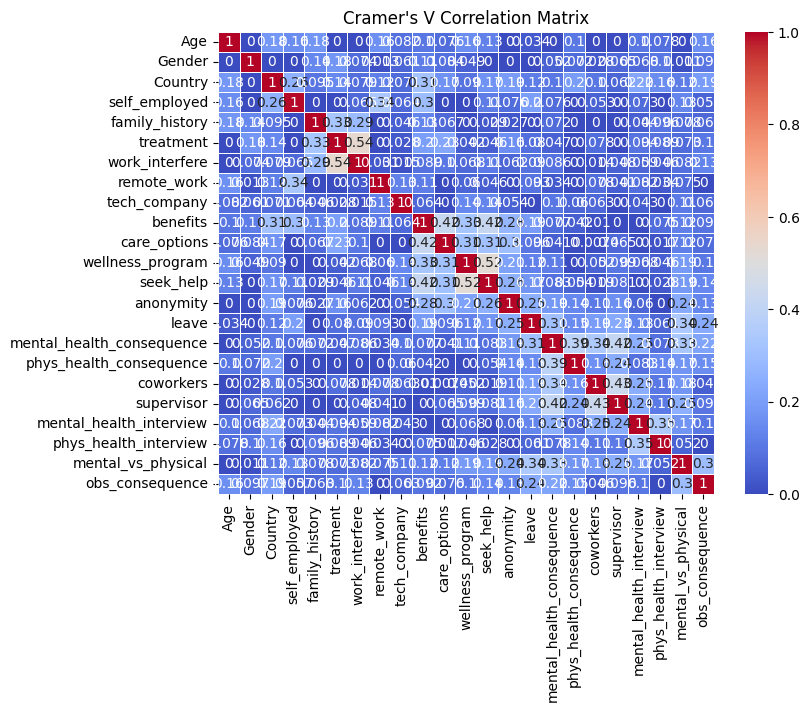

In [18]:
# Define a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return float(np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))))  # Convert to float

# Create an empty correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Fill the correlation matrix with Cramer's V values
for col1 in df.columns:
    for col2 in df.columns:
        corr_value = cramers_v(df[col1], df[col2])
        corr_matrix.loc[col1, col2] = corr_value

# Convert the values in the correlation matrix to float
corr_matrix = corr_matrix.astype(float)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Cramer's V Correlation Matrix")
plt.show()


In [19]:
df.to_csv('cleaned_data.csv', index=False)